In [29]:
import os
import stockdata as sd
import pandas as pd
import numpy as np
import scipy.optimize as spo
import matplotlib.pyplot as plt
import mplfinance as mpf
import yfinance as yf

In [17]:
period = '3mo'
data = sd.fetch_data(period)
sd.fill_gaps(data)

[*********************100%***********************]  8 of 8 completed


In [19]:
window = 10

In [20]:
n = 1.9

In [21]:
eth = pd.DataFrame()

In [22]:
eth = data['ETH-USD']

In [23]:
eth

,Open,High,Low,Close,Volume
Date,,,,,
2020-10-26,406.217987,411.279877,383.782898,393.888306,1.515568e+10
2020-10-27,393.888184,409.772858,390.608459,403.997040,1.394043e+10
2020-10-28,403.997101,408.964752,381.146332,388.650757,1.527644e+10
2020-10-29,388.651062,393.227692,381.288757,386.730103,1.292048e+10
2020-10-30,386.730255,391.464722,375.092407,382.819977,1.368806e+10
...,...,...,...,...,...
2021-01-20,1257.434570,1432.300049,1254.522949,1377.295898,4.719594e+10
2021-01-21,1257.434570,1432.300049,1254.522949,1377.295898,4.719594e+10
2021-01-22,1257.434570,1432.300049,1254.522949,1377.295898,4.719594e+10


In [24]:
eth['EMA'] = eth['Close'].ewm(span=window).mean() #exponential moving average
eth['+nSD'] = eth['EMA'] + eth['Close'].rolling(window=window).std() * n
eth['-nSD'] = eth['EMA'] - eth['Close'].rolling(window=window).std() * n

In [25]:
eth.iloc[-1]

Open      1.319921e+03
High      1.372824e+03
Low       1.256992e+03
Close     1.267074e+03
Volume    4.376250e+10
EMA       1.298297e+03
+nSD      1.451200e+03
-nSD      1.145393e+03
Name: 2021-01-26 00:00:00, dtype: float64

In [73]:
apd = [mpf.make_addplot(eth['EMA'], color='#1a4bff', width=0.5),
mpf.make_addplot(eth[['+nSD', '-nSD']], color='#7ab4e5', width=0.25)
]

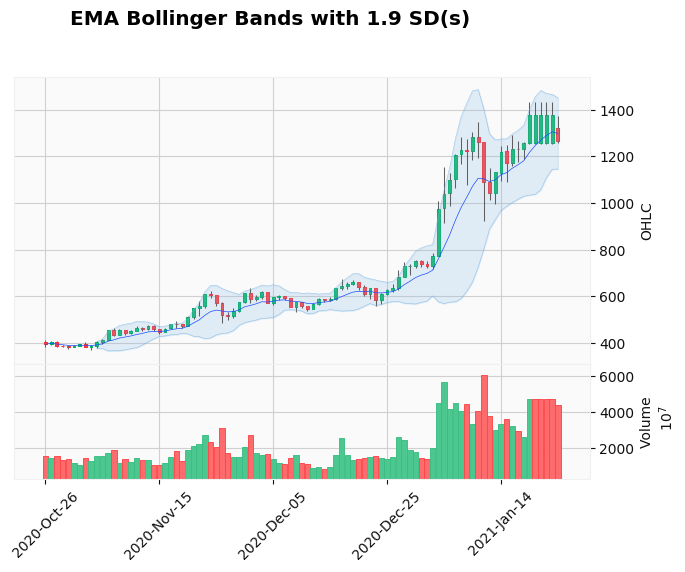

In [74]:
mpf.plot(eth, addplot=apd, type='candle', style='yahoo', volume=True, 
    fill_between=dict(y1=eth['-nSD'].values, y2=eth['+nSD'].values, alpha=0.2, color='#7ab4e5'),
    title=f'EMA Bollinger Bands with {n} SD(s)',
    ylabel=f'OHLC',
    ylabel_lower='Volume')